In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.utils import shuffle

/home/fsftn/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
auc2011 = pd.read_csv('2011_auctions.csv') 
role = pd.read_csv('player_role2011.csv') 
print role

     Unnamed: 0  role                  pname
0             0     1         Gautam+Gambhir
1             1     1           Yusuf+Pathan
2             2     0          Robin+Uthappa
3             3     1           Rohit+Sharma
4             4     1           Irfan+Pathan
5             5     1           Yuvraj+Singh
6             6     1         Saurabh+Tiwary
7             7     0     Mahela+Jayawardene
8             8     1           David+Hussey
9             9     0             Dale+Steyn
10           10     0   Muttiah+Muralitharan
11           11     1          Cameron+White
12           12     1         Jacques+Kallis
13           13     1         AB+de+Villiers
14           14     1            Ross+Taylor
15           15     1        Ravindra+Jadeja
16           16     1            Johan+Botha
17           17     1         Dinesh+Karthik
18           18     1          Piyush+Chawla
19           19     0              Sreesanth
20           20     1         Adam+Gilchrist
21        

In [3]:
auc2011[:5]

,team_name,player_name,ipl_team,buy_price,base_price
0,India,Gautam Gambhir,Kolkata Knight Riders,"$2,400,000","$200,000"
1,India,Yusuf Pathan,Kolkata Knight Riders,"$2,100,000","$300,000"
2,India,Robin Uthappa,Pune Warriors India,"$2,100,000","$200,000"
3,India,Rohit Sharma,Mumbai Indians,"$2,000,000","$200,000"
4,India,Irfan Pathan,Delhi Daredevils,"$1,900,000","$200,000"


In [4]:
balls = []
runs = []
avg = []
srate = []
batsman = []
base_price  = []
buy_price  = []
for index, row in auc2011.iterrows():
    pname = row['player_name'].replace(' ','+')
    fname = 'score_files/2011_t20_' + pname + '.csv'
    #print fname
    
    if (os.path.isfile(fname)):
        data = pd.read_csv(fname)
        
        data['balls']  =  data['balls'].astype('str') 
        data = data[data['balls'] != '\xc2\xa0']
        
        data['balls']  =  data['balls'].astype('float') 
        data['runs']  =  data['runs'].astype('float') 
        
        #data = data[data['runs'] != '\xc2\xa0']
        if(len(data) < 2):
            continue
            
        bprice  = str(row['base_price'].replace(',',''))
        bprice  = bprice.replace('$','')
        bprice = float(bprice)
        
        b2price  = str(row['buy_price'].replace(',',''))
        b2price  = b2price.replace('$','')
        b2price = float(b2price)
    
        batsman.append(pname)
        base_price.append(bprice) 
        buy_price.append(b2price)

        balls.append(np.sum(data['balls']))
        runs.append(np.sum(data['runs']))
        avg.append(np.sum(data['runs'])/(len(data)))
        srate.append(np.mean([(r/b)*100 for r,b in zip(data['runs'], data['balls'])]))
        
        
        
    else:
        print 'file no exists'
        print fname
        #continue

In [5]:
s2011 = pd.DataFrame()
s2011['batsman'] = batsman
s2011['base_price'] = base_price
s2011['buy_price'] = buy_price
s2011['runs'] = runs
s2011['balls'] = balls
s2011['avg'] = avg
s2011['srate'] = srate

In [6]:
s2011.to_csv('s2011_data.csv')

In [7]:
s2011

,batsman,base_price,buy_price,runs,balls,avg,srate
0,Gautam+Gambhir,200000,2400000,346,279,24.714286,115.559911
1,Yusuf+Pathan,300000,2100000,532,339,21.280000,124.614052
2,Robin+Uthappa,200000,2100000,563,345,23.458333,149.271477
3,Rohit+Sharma,200000,2000000,551,405,26.238095,NaN
4,Irfan+Pathan,200000,1900000,276,186,21.230769,165.664220
5,Yuvraj+Singh,400000,1800000,341,282,17.050000,106.493436
6,Saurabh+Tiwary,100000,1600000,501,367,27.833333,115.828172
7,Mahela+Jayawardene,400000,1500000,1156,757,36.125000,131.922540
8,David+Hussey,200000,1400000,1257,942,27.326087,124.055999
9,Dale+Steyn,200000,1200000,41,37,5.125000,69.444444


In [10]:
s2011.corr(method='pearson', min_periods=1)
s2011 = shuffle(s2011)
s2011[:5]

,batsman,base_price,buy_price,runs,balls,avg,srate
84,Joginder+Sharma,100000,150000,22,24,11.000000,109.523810
109,Travis+Birt,20000,20000,142,116,15.777778,116.796537
3,Rohit+Sharma,200000,2000000,551,405,26.238095,NaN
24,Ravichandran+Ashwin,100000,850000,35,43,4.375000,87.435897
32,Kumar+Sangakkara,300000,700000,676,546,26.000000,110.525126


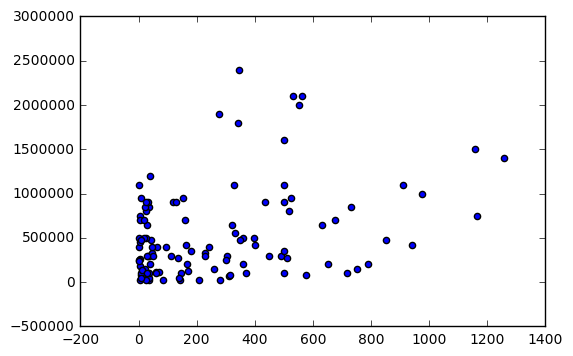

In [11]:
plt.scatter(s2011['runs'],s2011['buy_price'])

In [80]:
import sklearn
from sklearn import linear_model
s2011.dropna(inplace = True)
len_data = len(s2011)
train_set = s2011[:int(len_data*0.8)]
len(train_set)
test_set = s2011[len(train_set):]
print (len(test_set['buy_price']))

21


In [25]:
regr = linear_model.LinearRegression()

In [ ]:
#complete working model 
#do not mess 
cols = ['base_price','runs','avg','srate']
base_price = train_set['base_price']
runs = train_set['runs']
srate = train_set['srate']
avg = train_set['avg']
ans  = train_set['runs']

 
cols = ['runs','avg','srate','base_price']
a = train_set[cols]
regr.fit(a,ans)
test_feat = test_set[cols]

vals = np.array(regr.predict(test_feat))
print len(vals)
for inde,row in test_set.iterrows():
    vals = np.array(regr.predict(row[cols]))
    print vals,row['runs']

In [97]:
#complete working model 
#do not mess 
#from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

cols = ['base_price','runs','avg','srate']
base_price = train_set['base_price']
runs = train_set['runs']
srate = train_set['srate']
avg = train_set['avg']
ans  = 'buy_price'

 
cols = ['runs','avg','srate','base_price']
a = train_set[cols]
regr.fit(a,train_set[ans])
test_feat = test_set[cols]

vals = np.array(regr.predict(test_feat))
preds = regr.predict(test_set[cols])
print len(vals)
print mean_absolute_percentage_error(np.array(test_set[ans]), np.array(preds))

21
101.852396888


In [98]:
regr.coef_

array([  5.11886159e+02,  -6.47711605e+03,  -2.11643510e+02,
         1.74373638e+00])

In [75]:
def linearRegModel(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    
     
    mse = metrics.mean_squared_error(predictions, data[outcome]) 
    print 'mse',mse
     
    
   
 
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 
   

In [79]:
from sklearn.linear_model import Ridge
outcome_var = 'runs'
model = LinearRegression()
predictor_var = ['avg','srate']
linearRegModel(model, s2011, predictor_var,outcome_var)
m = model.coef_
print("coefficients are")
print(m)

mse 41058.1625331
coefficients are
[ 20.25006358   0.31576345]


In [78]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mse',max_depth=4, min_samples_split=2, min_samples_leaf= 5)
linearRegModel(model, s2011, predictor_var,outcome_var)

mse 24853.9112054


/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


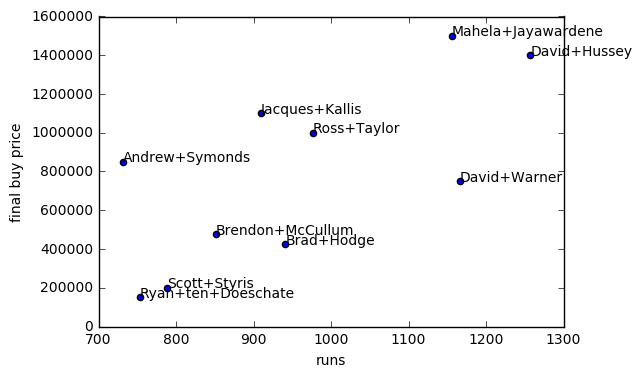

In [84]:
s2011_sorted = s2011.sort(['runs'])
s2011_s = s2011_sorted[-10:]
x =  np.array(s2011_s['runs'])
y =  np.array(s2011_s['buy_price'])

names= np.array(s2011_s['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
    ax.set_xlabel('runs')
    ax.set_ylabel('final buy price')
#plt.x_label('runs')
#plt.set_xlabel('xlabel')

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


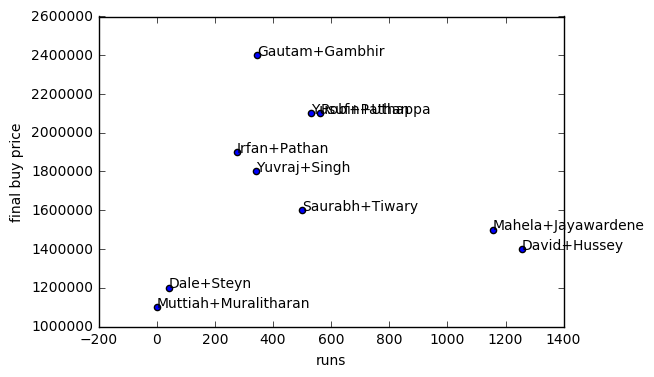

In [85]:
s2011_sorted = s2011.sort(['buy_price'])
s2011_s = s2011_sorted[-10:]
#print s2011_s
x =  np.array(s2011_s['runs'])
y =  np.array(s2011_s['buy_price'])

names= np.array(s2011_s['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
    ax.set_xlabel('runs')
    ax.set_ylabel('final buy price')

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


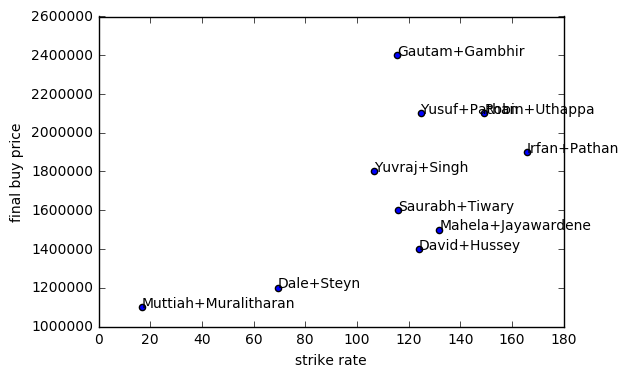

In [86]:
s2011_sorted = s2011.sort(['buy_price'])
s2011_s = s2011_sorted[-10:]
#print s2011_s
x =  np.array(s2011_s['srate'])
y =  np.array(s2011_s['buy_price'])

names= np.array(s2011_s['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
    ax.set_xlabel('strike rate')
    ax.set_ylabel('final buy price')

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


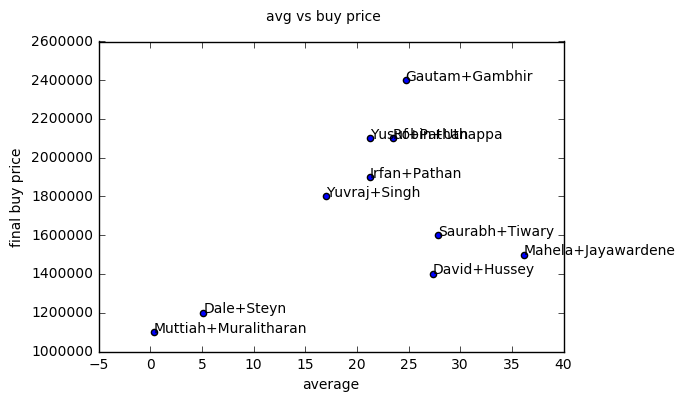

In [89]:
s2011_sorted = s2011.sort(['buy_price'])
s2011_s = s2011_sorted[-10:]
#print s2011_s
x =  np.array(s2011_s['avg'])
y =  np.array(s2011_s['buy_price'])

names= np.array(s2011_s['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
fig.suptitle('avg vs buy price')
plt.xlabel('average')
plt.ylabel('final buy price')
 